In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

dt = datasets.load_iris()

X = dt.data[:, 0:2]
Y = dt.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

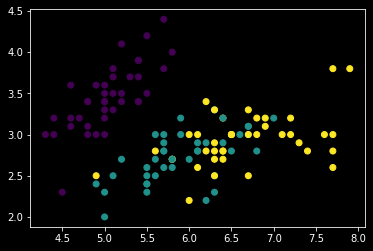

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

In [ ]:
"""
Support Vector Machine (Linear)
------------------------
Parameters:
C: int
    coefficient of classification error
n_iterations: int
    Number of epochs
lr: float
    learning rate
Attributes:
W: 1D array of size equal to number of features
    Weights of the model
history: 2D array 
    error after each epoch
"""
class SVM:
    def __init__(self, C=1, n_iterations=10, lr=0.1):
        self.C = C
        self.history = []
        self.n_iterations = n_iterations
        self.W = np.array([])
        self.lr = lr
    
    def __calculateCost(self, X, Y):
        X = np.asmatrix(X)
        Y = np.asmatrix(Y)
        cost = 0
        cost += self.C * np.maximum( 1- Y.T * (self.W.T * X.T), np.zeros(len(Y))).sum()
        cost += self.W.dot(self.W) 
        return cost
    
    def __updateWeights(self, X, Y):
        #After studying calculus
        
    def fit(self, X, Y):
        if(len(self.W) == 0 ):
            self.W = np.zeros(len(X[0]))
        for i in range(self.n_iterations):
            self.history.append(self.__calculateCost(X, Y))
            self.__updateWeights(X, Y)
    
    def predict(self, X):
        X = np.asmatrix(X)
        WX = (self.W.T * X.T)
        WX = np.array(WX).reshape(-1)
        pred = [1 if WX[i]>0 else 0 for i in range(len(WX))]
        return pred

In [ ]:
clf = SVM(lr = 0.0001)
clf.fit(X_train, Y_train)

In [ ]:
plt.plot(range(clf.n_iterations), clf.history)

In [ ]:
pred = clf.predict(X_test)
score = (pred == Y_test).sum() / len(Y_test)
score

In [5]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)


0.8333333333333334

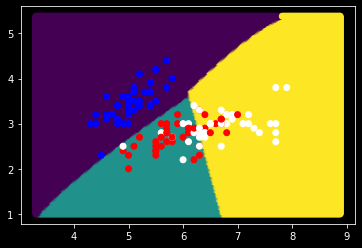

In [7]:
x1 = np.arange(min(X_train[:,0]) -1, max(X_train[:,0]) +1, 0.02 )
x2 = np.arange(min(X_train[:,1]) -1, max(X_train[:,1]) +1, 0.02 )
xx1, xx2 = np.meshgrid(x1, x2)
pred = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.scatter(xx1, xx2, c=pred)

colors = ["blue", "red", "white"]
cmap = []
for i in range(len(Y_train)):
    y = Y_train[i]
    index = np.where(Y_train[i] == np.unique(Y_train))[0][0]
    cmap.append(colors[index])
plt.scatter(X_train[:, 0], X_train[:, 1], c=cmap)
plt.style.use("dark_background")
plt.show()